<a href="https://colab.research.google.com/github/NABIL-rgb69/Recomendation/blob/main/Dataset_Rekomendasi_PI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import ipywidgets as widgets
from IPython.display import display, clear_output
from google.colab import files


uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

Saving Netflix_movies_and_tv_shows_clustering (1).csv to Netflix_movies_and_tv_shows_clustering (1) (7).csv


In [110]:
df['duration_int'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['duration_int'] = df['duration_int'].fillna(df['duration_int'].median())
df_movies = df[df['type'] == 'Movie'].copy()

In [112]:

if 'genres_str' not in df.columns:
    if 'listed_in' in df.columns:
        df['genres_str'] = df['listed_in']
    else:
        raise KeyError("Dataset tidak punya kolom 'genres_str' atau 'listed_in'")


In [113]:
df_movies = df[df['type'] == 'Movie'].copy()

In [114]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_movies['genres_str'].fillna(""))

kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df_movies['Cluster'] = kmeans.fit_predict(X) + 1

In [115]:
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
cluster_labels = {}
for cluster_id in range(1, 7):
    top_genres = [terms[ind] for ind in order_centroids[cluster_id-1, :3]]
    cluster_labels[cluster_id] = ", ".join(top_genres)
df_movies['Cluster_Label'] = df_movies['Cluster'].map(cluster_labels)

print("\n📊 Label Cluster:")
for cid, label in cluster_labels.items():
    print(f"Cluster {cid}: {label}")



📊 Label Cluster:
Cluster 1: movies, dramas, international
Cluster 2: thrillers, horror, movies
Cluster 3: children, family, movies
Cluster 4: stand, comedy, musicals
Cluster 5: documentaries, movies, international
Cluster 6: adventure, action, international


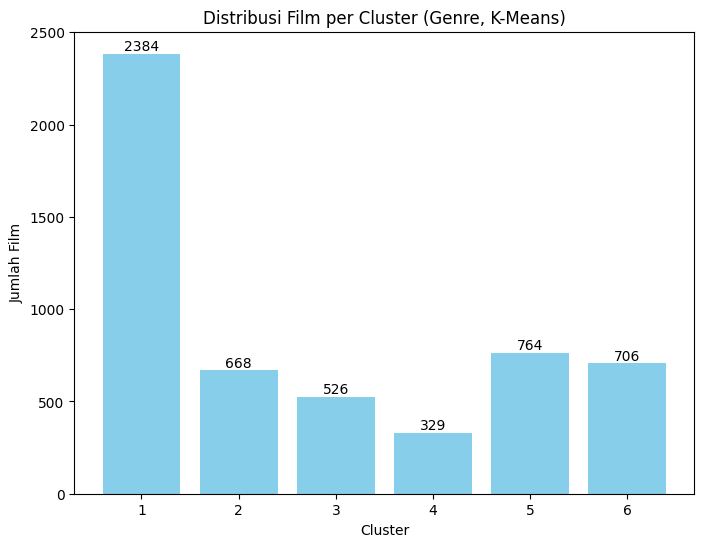

In [116]:
cluster_counts = df_movies['Cluster'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, int(yval), ha='center', va='bottom')
plt.title("Distribusi Film per Cluster (Genre, K-Means)")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Film")
plt.show()


In [117]:
input_user = widgets.Text(placeholder='Masukkan nama user')
dropdown_film = widgets.Dropdown(
    options=sorted(df_movies['title'].dropna().unique()),
    description='Pilih Film:'
)
tombol_rekom = widgets.Button(description="Tampilkan Rekomendasi")
output_rekom = widgets.Output()

def show_rekom(b):
    with output_rekom:
        clear_output()
        user = input_user.value
        film = dropdown_film.value
        if film not in df_movies['title'].values:
            print("⚠️ Film tidak ditemukan")
            return
        c = df_movies.loc[df_movies['title'] == film, 'Cluster'].values[0]
        cluster_label = df_movies.loc[df_movies['title'] == film, 'Cluster_Label'].values[0]
        genre_pilihan = df_movies.loc[df_movies['title'] == film, 'genres_str'].values[0]
        print(f"👤 User   : {user}")
        print(f"🎬 Film   : {film}")
        print(f"📊 Cluster: {c} ({cluster_label})")
        print(f"🎭 Genre  : {genre_pilihan}")
        print("\n✅ Rekomendasi film lain dalam cluster serupa:\n")
        rekom = df_movies[(df_movies['Cluster'] == c) & (df_movies['title'] != film)]
        if len(rekom) > 0:
            display(
                rekom[['title', 'genres_str', 'release_year', 'duration_int']]
                .sample(min(5, len(rekom)), random_state=42)
            )
        else:
            print("Tidak ada rekomendasi lain dalam cluster ini.")

tombol_rekom.on_click(show_rekom)
display(input_user, dropdown_film, tombol_rekom, output_rekom)

Text(value='', placeholder='Masukkan nama user')

Dropdown(description='Pilih Film:', options=('#Alive', '#AnneFrank - Parallel Stories', '#FriendButMarried', '…

Button(description='Tampilkan Rekomendasi', style=ButtonStyle())

Output()

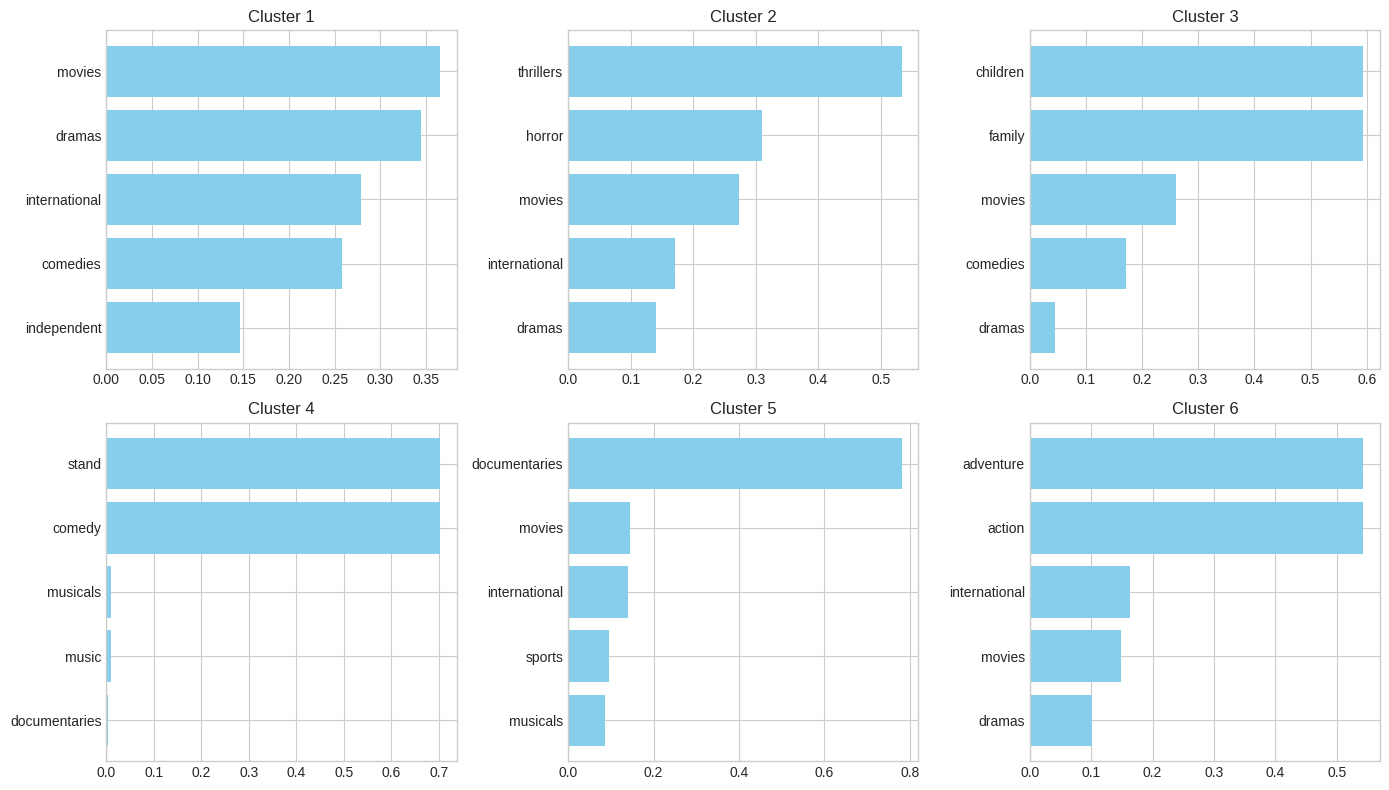

In [119]:
import matplotlib.pyplot as plt
import numpy as np

# Visualisasi top genre per cluster
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for i in range(6):
    cluster_id = i + 1
    indices = order_centroids[i, :5]
    top_genres = [terms[ind] for ind in indices if ind < len(terms)]
    top_weights = kmeans.cluster_centers_[i, indices]

    axes[i].barh(top_genres, top_weights, color='skyblue')
    axes[i].set_title(f"Cluster {cluster_id}")
    axes[i].invert_yaxis()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


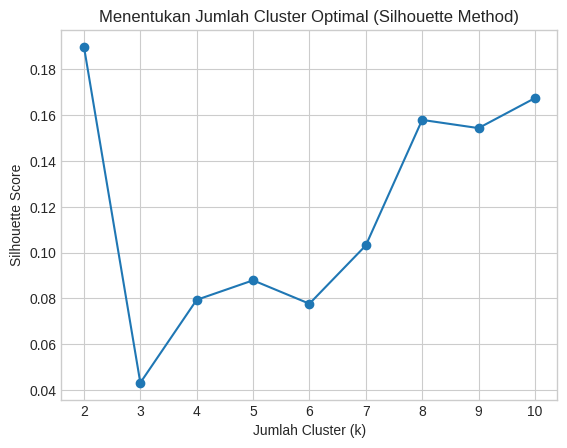

k=2: Silhouette Score = 0.1898
k=3: Silhouette Score = 0.0432
k=4: Silhouette Score = 0.0794
k=5: Silhouette Score = 0.0879
k=6: Silhouette Score = 0.0777
k=7: Silhouette Score = 0.1031
k=8: Silhouette Score = 0.1579
k=9: Silhouette Score = 0.1543
k=10: Silhouette Score = 0.1674


In [120]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

df['duration_int'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['duration_int'] = df['duration_int'].fillna(df['duration_int'].median())

vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
X_genre = vectorizer.fit_transform(df['listed_in'].fillna(""))

X = np.hstack((X_genre.toarray(), df[['duration_int']].values))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.plot(K, silhouette_scores, marker='o')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.title("Menentukan Jumlah Cluster Optimal (Silhouette Method)")
plt.show()

for k, score in zip(K, silhouette_scores):
    print(f"k={k}: Silhouette Score = {score:.4f}")
